# Avivo Exploratory Data Analysis

## Importing libraries and loading data

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
import statsmodels.api as sm
import scipy

#setting visualization style and inline plots
sns.set()
plt.figure(figsize = (8,5))

c:\users\prabl\anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
c:\users\prabl\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#loading the data into a dataframe
df = pd.read_csv("C:/Users/prabl/Documents/Star82/drive-download-20180221T153449Z-001/admission_discharge_demographic.csv", usecols = range(1,69))

In [4]:
print("Dimensions: ",df.shape)
df.head()

Dimensions:  (3578, 68)


,Form.Date,Program,Staff,Client.Number,Any.children.living.else.where.due.to.CPS.court.order.or.action,CD.Treatments.used,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,...,Total.Charges..dollars.only.,Victim.of.abuse,Were.treatment.services.respectful.of.culture,Where.client.has.been.living.in.past.30.days,Will.client.be.living.in.environment..conducive.to.recovery,Date.of.Birth,Age,Sex,Race,Form.Flag
0,9/12/2014,Treatment - IDD Men,"Qualley, Ann",4547,Not applicable - no children/no child protect ...,NaN,No problem,No problem,Moderate problem,Moderate problem,...,NaN,No,Unknown,"Independent living - including on own, self su...",Yes,2/10/1964,53.0,Male,Black or African American,admission
1,9/26/2014,Treatment - IDD Men,"Qualley, Ann",111155997,Not applicable - no children/no child protect ...,NaN,No problem,No problem,Minor problem,Moderate problem,...,9270,No,Unknown,"Independent living - including on own, self su...",Unknown,3/28/1985,32.0,Male,Black or African American,admission
2,9/29/2014,Treatment - IDD Women,"Salsness, Carrie",111156277,Not applicable - no children/no child protect ...,NaN,Moderate problem,Minor problem,Moderate problem,Serious problem,...,NaN,"Yes, physical and sexual",Unknown,"Independent living - including on own, self su...",Unknown,7/20/1980,37.0,Female,White,admission
3,10/1/2014,Treatment - IDD Women,"Salsness, Carrie",111156358,Not applicable - no children/no child protect ...,NaN,No problem,Serious problem,Moderate problem,Moderate problem,...,NaN,No,Unknown,Dependent living - dependent children and/or a...,Unknown,8/14/1991,26.0,Female,Black or African American,admission
4,10/1/2014,Treatment - IDD Women,"Salsness, Carrie",111156017,Not applicable - no children/no child protect ...,NaN,Minor problem,Moderate problem,Moderate problem,Extreme problem,...,NaN,"Yes, physical and sexual",Unknown,Dependent living - dependent children and/or a...,Unknown,6/13/1966,51.0,Female,Black or African American,admission


## Checking for duplicate rows in admission_discharge combined data

In [5]:
#creating a new dataframe without the 'form flag' column
df2 = df.loc[:,df.columns!='Form.Flag']
#creating a new column with a boolean flag for duplicated row or not 
# marks all occurences of the duplicate rows EXCEPT the first occurence as True 
df2['Duplicate'] = df2.duplicated(keep = 'first')

#computing count of duplicate rows
duplicates = df2['Duplicate'].sum()

#computing percentage of duplicate rows
total = df2.shape[0]
percent = duplicates/total
print('Percentage of duplicate rows: ',percent*100)

Percentage of duplicate rows:  50.0


**This shows that all the rows of the admission and discharge form data are duplicates. **   
Thus, removing admisssion form data from our dataframe and dropping the form.flag column.

In [6]:
#creating a new dataframe with only discharge data
df_dis = df[(df['Form.Flag'] != 'admission')]
#dropping form flag column
df_dis.drop(['Form.Flag'], axis=1)
df_dis.sample(5)

,Form.Date,Program,Staff,Client.Number,Any.children.living.else.where.due.to.CPS.court.order.or.action,CD.Treatments.used,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,...,Total.Charges..dollars.only.,Victim.of.abuse,Were.treatment.services.respectful.of.culture,Where.client.has.been.living.in.past.30.days,Will.client.be.living.in.environment..conducive.to.recovery,Date.of.Birth,Age,Sex,Race,Form.Flag
2530,3/23/2016,Treatment - IDD Women,"Muse, Suad",111160389,Unknown,NaN,Minor problem,No problem,Minor problem,Serious problem,...,NaN,Unknown,Unknown,Unknown,Unknown,6/28/1977,40.0,Female,White,discharge
3082,2/10/2017,Treatment - Family - Outpatient,"Istok, Eden",111161458,Not applicable - no children/no child protect ...,NaN,No problem,No problem,Moderate problem,Minor problem,...,NaN,"Yes, physical and sexual",Yes,Homeless - no fixed address (includes shelters),Yes,12/16/1982,35.0,Female,American Indian or Alaska Native,discharge
3305,7/14/2017,Treatment - IDD Women,"Roche, Maria",111164227,Not applicable - no children/no child protect ...,NaN,No problem,Minor problem,Moderate problem,No problem,...,NaN,"Yes, physical and sexual",Yes,"Independent living - including on own, self su...",Yes,3/24/1979,38.0,Female,White,discharge
2002,5/8/2015,Treatment - IDD Women,"Qualley, Ann",111157154,Not applicable - no children/no child protect ...,Anti-Anxiety medication,No problem,No problem,Minor problem,Moderate problem,...,NaN,No,Unknown,"Independent living - including on own, self su...",Yes,12/15/1990,27.0,Female,Black or African American,discharge
1813,12/23/2014,Treatment - IDD Men,"Smith, Glenn",111156572,Unknown,NaN,Minor problem,No problem,Moderate problem,Serious problem,...,2900,No,Yes,"Independent living - including on own, self su...",Unknown,2/19/1988,29.0,Male,Black or African American,discharge


In [7]:
#checking for repeat clients
dups = df_dis.duplicated(['Client.Number'], keep = 'first')
#print(dups)
dcount = dups.sum()
print('No of repeat visits: ',dcount)

No of repeat visits:  212


In [8]:
#pandas_profiling.ProfileReport(df_dis)

## Computing Completion Rate

In [9]:
#Creating a new comlumn for completed and not completed
df_dis = df_dis.assign(Completed = None)
for (index,row) in df_dis.iterrows():
    if (df_dis.loc[index,'Reason.for.Discharge'] == 'Completed program') or (df_dis.loc[index,'Reason.for.Discharge'] == 'Transferred to other program'):
        df_dis.loc[index,'Completed'] = 1
    else:
        df_dis.loc[index,'Completed'] = 0

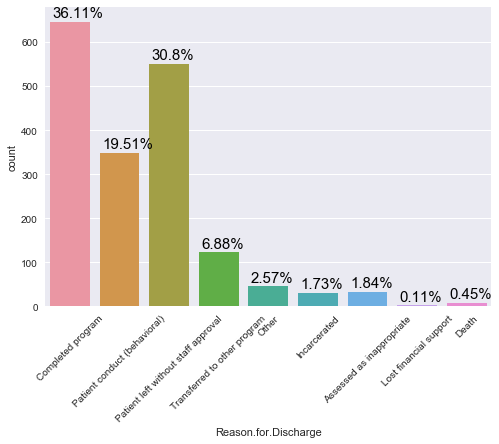

In [19]:
g = sns.countplot(x ='Reason.for.Discharge', data = df_dis)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

#creating a list to append totals
totals = []

# find the values and append to list
for i in g.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in g.patches:
    # get_x pulls left or right; get_height pushes up or down
    g.text(i.get_x()+.05, i.get_height()+10, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

In [21]:
print(df_dis.groupby('Completed').Completed.count())

#calculating proportions of survivors
print("\nProportions ")
print("Left program: ", df_dis[df_dis.Completed==0].Completed.count()/df_dis.shape[0] * 100,"%")
print("Completed or Transferred: ",df_dis[df_dis.Completed==1].Completed.count()/df_dis.shape[0] * 100,"%")

Completed
0    1020
1     769
Name: Completed, dtype: int64

Proportions 
Left program:  57.0150922303 %
Completed or Transferred:  42.9849077697 %


## Exploring relation between CHSR Dimensions and Completion 

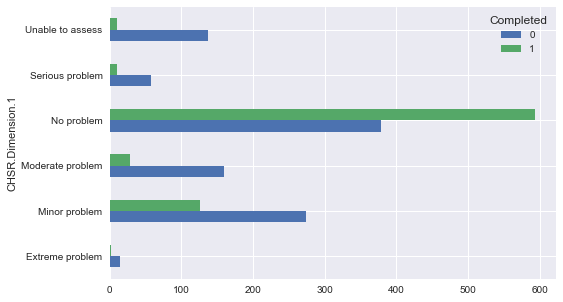

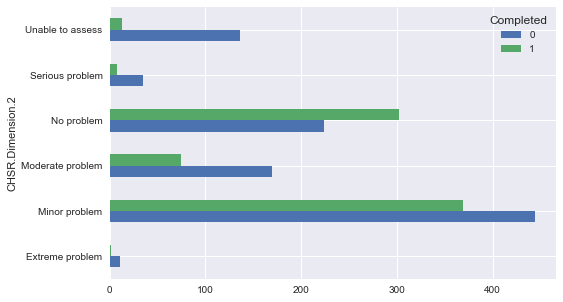

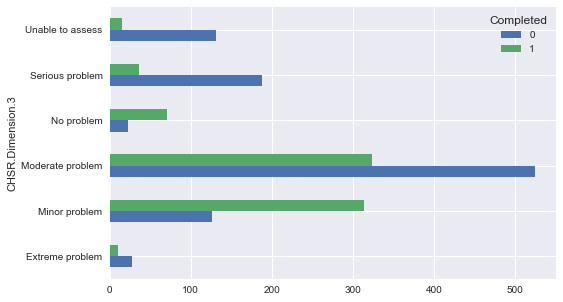

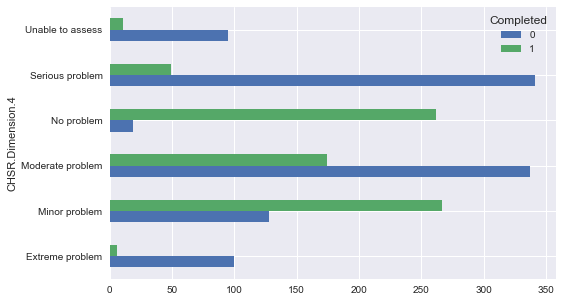

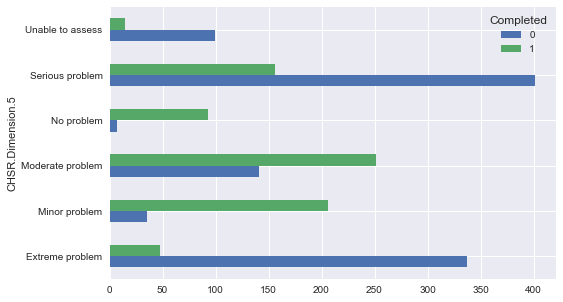

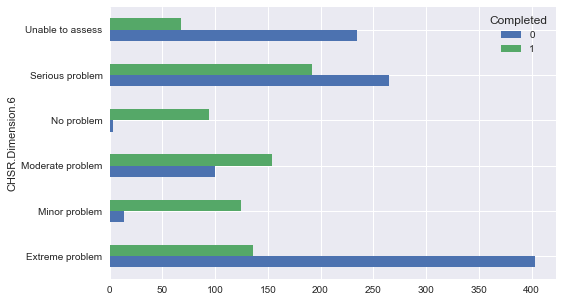

In [22]:
pd.crosstab(df_dis['CHSR.Dimension.1'], df_dis['Completed']).plot(kind = 'barh', figsize = (8,5))
pd.crosstab(df_dis['CHSR.Dimension.2'], df_dis['Completed']).plot(kind = 'barh', figsize = (8,5))
pd.crosstab(df_dis['CHSR.Dimension.3'], df_dis['Completed']).plot(kind = 'barh', figsize = (8,5))
pd.crosstab(df_dis['CHSR.Dimension.4'], df_dis['Completed']).plot(kind = 'barh', figsize = (8,5))
pd.crosstab(df_dis['CHSR.Dimension.5'], df_dis['Completed']).plot(kind = 'barh', figsize = (8,5))
pd.crosstab(df_dis['CHSR.Dimension.6'], df_dis['Completed']).plot(kind = 'barh', figsize = (8,5))

In [23]:
#creating a new dataframe with just the CHSR dimesnions and the Completion columns
df_chsr = df_dis[['CHSR.Dimension.1','CHSR.Dimension.2','CHSR.Dimension.3','CHSR.Dimension.4',
                 'CHSR.Dimension.5','CHSR.Dimension.6', 'Completed']]
df_chsr.sample(5)

,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,CHSR.Dimension.5,CHSR.Dimension.6,Completed
3425,Minor problem,No problem,Moderate problem,Moderate problem,Extreme problem,Serious problem,0
2253,No problem,No problem,Minor problem,Minor problem,Minor problem,Unable to assess,0
3329,No problem,Minor problem,Moderate problem,Minor problem,Serious problem,Extreme problem,0
2983,Minor problem,Minor problem,Moderate problem,Minor problem,Minor problem,Minor problem,1
2596,Unable to assess,Unable to assess,Unable to assess,Serious problem,Extreme problem,Unable to assess,0


In [24]:
#creating dummy variables for CHSR dimensions
df_chsr = pd.concat([pd.get_dummies(df_chsr, columns = ['CHSR.Dimension.1','CHSR.Dimension.2','CHSR.Dimension.3','CHSR.Dimension.4',
                                           'CHSR.Dimension.5','CHSR.Dimension.6'], drop_first=True)], axis =1)
df_chsr.sample(5)

,Completed,CHSR.Dimension.1_Minor problem,CHSR.Dimension.1_Moderate problem,CHSR.Dimension.1_No problem,CHSR.Dimension.1_Serious problem,CHSR.Dimension.1_Unable to assess,CHSR.Dimension.2_Minor problem,CHSR.Dimension.2_Moderate problem,CHSR.Dimension.2_No problem,CHSR.Dimension.2_Serious problem,...,CHSR.Dimension.5_Minor problem,CHSR.Dimension.5_Moderate problem,CHSR.Dimension.5_No problem,CHSR.Dimension.5_Serious problem,CHSR.Dimension.5_Unable to assess,CHSR.Dimension.6_Minor problem,CHSR.Dimension.6_Moderate problem,CHSR.Dimension.6_No problem,CHSR.Dimension.6_Serious problem,CHSR.Dimension.6_Unable to assess
2105,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2352,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1997,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2322,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
#converting 'completed' to numeric
df_chsr['Completed'] = pd.to_numeric(df_chsr['Completed'])
#print(df_chsr.dtypes)

In [26]:
#Running a logistic regression of the chsr dimensions versus completion
cols = df_chsr.columns[1:]
model = sm.Logit(df_chsr['Completed'].astype(int),df_chsr[cols])
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.438080
         Iterations 8
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.359      
Dependent Variable:      Completed             AIC:                   1627.4487  
Date:                    2018-03-13 17:51      BIC:                   1792.1311  
No. Observations:        1789                  Log-Likelihood:        -783.72    
Df Model:                29                    LL-Null:               -1222.4    
Df Residuals:            1759                  LLR p-value:           6.5382e-166
Converged:               1.0000                Scale:                 1.0000     
No. Iterations:          8.0000                                                  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------

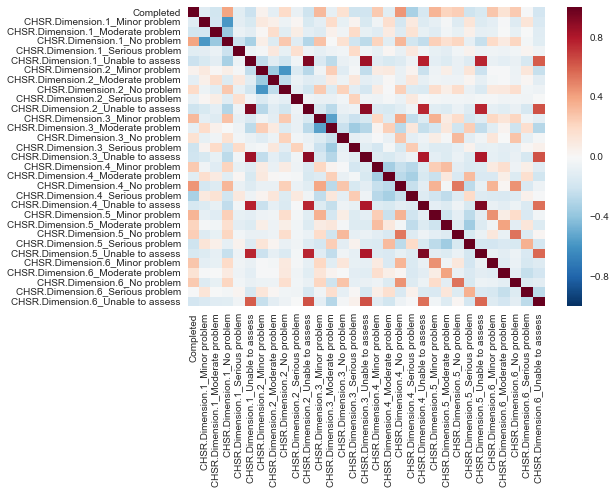

In [31]:
sns.heatmap(df_chsr.corr())

**Looking at the regression outputs and the correlations we can see that: **
* The "No problem" fields of all dimensions have high correlation with Completed - indicating no problems in 1 or more CHSR dimensions result in higher completion rates
* CHSR Dimension 3,4 Minor problem and CHSR dimension 5,6 minor and moderate problem seems to have higher correlation with Completed. 
  
Note that here: 
* CHSR Dimension 3 - Emotional/Behavioral/Cognitive Conditions and Complications  
* CHRS Dimension 4 – Treatment Acceptance/Resistance
* CHRS Dimension 5 – Relapse/Continued Use/Continued Problem Potential
* CHRS Dimension 6 – Recovery Environment

**Decoding the summary we see that the following regressors are significant:**

Regressor | pvalue
---|---
CHSR.Dimension.3_Moderate problem    |0.0272  
CHSR.Dimension.4_Minor problem       |0.0001  
CHSR.Dimension.4_Moderate problem    |0.0227  
CHSR.Dimension.4_No problem          |0.0000  
CHSR.Dimension.5_Minor problem       |0.0000  
CHSR.Dimension.5_Moderate problem    |0.0000  
CHSR.Dimension.5_No problem          |0.0188  

**Let us run a chi-square test to check the dependance between CHSR Dimension 3,4,5 and Completion respectively: **

In [18]:
#Contingency tables for each pair
tab1 = pd.crosstab(df_dis['CHSR.Dimension.3'], df_dis['Completed'])
tab2 = pd.crosstab(df_dis['CHSR.Dimension.4'], df_dis['Completed'])
tab3 = pd.crosstab(df_dis['CHSR.Dimension.5'], df_dis['Completed'])
print('**Table1**')
print(tab1)
print('**Table2**')
print(tab2)
print('**Table3**')
print(tab3)

#chi-square tests
chiTest1 = scipy.stats.chi2_contingency(tab1)
chiTest2 = scipy.stats.chi2_contingency(tab2)
chiTest3 = scipy.stats.chi2_contingency(tab3)

print('*** Test1 CHSR Dim 3 : Chi-square value, p-value and expected counts: ')
print(chiTest1)
print('*** Test2 CHSR Dim 4 : Chi-square value, p-value and expected counts: ')
print(chiTest2)
print('*** Test3 CHSR Dim 5 : Chi-square value, p-value and expected counts: ')
print(chiTest3)

**Table1**
Completed           0    1
CHSR.Dimension.3          
Extreme problem    28   10
Minor problem     126  314
Moderate problem  524  323
No problem         23   71
Serious problem   188   36
Unable to assess  131   15
**Table2**
Completed           0    1
CHSR.Dimension.4          
Extreme problem   100    6
Minor problem     128  267
Moderate problem  337  174
No problem         19  262
Serious problem   341   49
Unable to assess   95   11
**Table3**
Completed           0    1
CHSR.Dimension.5          
Extreme problem   337   48
Minor problem      35  206
Moderate problem  141  251
No problem          7   93
Serious problem   401  156
Unable to assess   99   15
*** Test1 CHSR Dim 3 : Chi-square value, p-value and expected counts: 
(327.60338605205135, 1.1578195553206697e-68, 5, array([[  21.66573505,   16.33426495],
       [ 250.86640581,  189.13359419],
       [ 482.91783119,  364.08216881],
       [  53.5941867 ,   40.4058133 ],
       [ 127.7138066 ,   96.2861934 ],
     

**Looking at the p-values of the chi-square - We see that these are extremely low, confirming our observations from the logistic regression that there is a strong dependence of the CHSR Dimension 4, 5 and 3(listed in decreasing order of dependance) order on the Completion of the program.**

## Exploring relation between CD(Chemical Dependancy) Drug Diagnosis and Completion

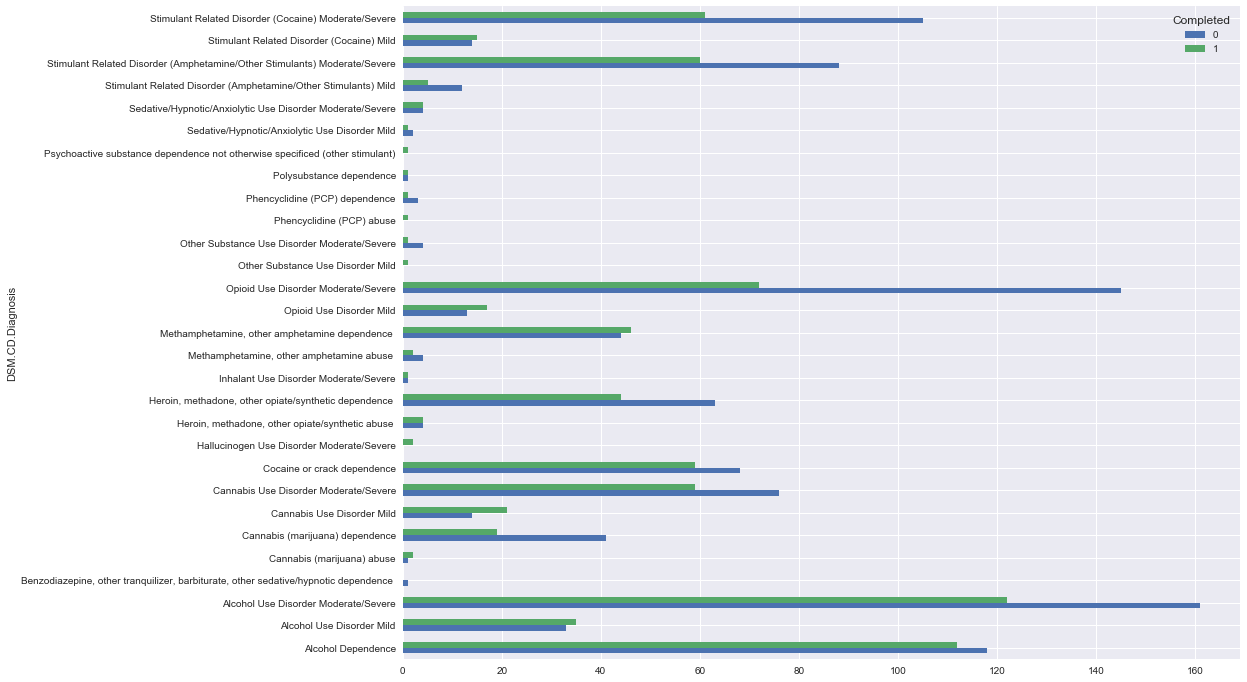

In [39]:
pd.crosstab(df_dis['DSM.CD.Diagnosis'], df_dis['Completed']).plot(kind = 'barh', figsize = (15,12))
#Can we combine the various categories into common Diagnosis? Would that effect this? 

**Since there are multiple levels let's bucket the levels and then look at the relationship between diagnosis and completion**

In [40]:
#Lets take a look at the different levels of diagnosis there are
df_dis['DSM.CD.Diagnosis'].unique()

array(['Cocaine or crack dependence', 'Cannabis (marijuana) dependence',
       'Stimulant Related Disorder (Cocaine) Moderate/Severe',
       'Cannabis Use Disorder Moderate/Severe', 'Alcohol Dependence',
       'Stimulant Related Disorder (Amphetamine/Other Stimulants) Moderate/Severe',
       'Phencyclidine (PCP) dependence',
       'Alcohol Use Disorder Moderate/Severe',
       'Heroin, methadone, other opiate/synthetic dependence ',
       'Methamphetamine, other amphetamine dependence ',
       'Polysubstance dependence', 'Phencyclidine (PCP) abuse',
       'Other Substance Use Disorder Moderate/Severe',
       'Opioid Use Disorder Moderate/Severe',
       'Heroin, methadone, other opiate/synthetic abuse ',
       'Cannabis (marijuana) abuse',
       'Methamphetamine, other amphetamine abuse ',
       'Benzodiazepine, other tranquilizer, barbiturate, other sedative/hypnotic dependence ',
       'Opioid Use Disorder Mild',
       'Stimulant Related Disorder (Cocaine) Mild',
      

In [41]:
#Calculating number of clients enrolled for each type of diagnosis
freq = df_dis.groupby('DSM.CD.Diagnosis').Completed.count()
#print(freq)

#Getting list of infrequent diagnosis
infreq = [lab for lab,count in freq.items() if count<=10]
#print(type(infreq))

In [42]:
#bucketing the Different levels of disgnosis into a common bucket and putting the less common ones into a common "Other" bucket
for ind,row in df_dis.iterrows():
    value = df_dis.loc[ind, 'DSM.CD.Diagnosis'] 
    if value in infreq:
        df_dis.loc[ind, 'DSM.CD.Diagnosis'] = "Other Diagnosis"
    elif value.find("Alcohol Use") != -1:
        #print("here")
        df_dis.loc[ind, 'DSM.CD.Diagnosis'] = "Alcohol Use"
    elif value.find("Cannabis Use") != -1:
        df_dis.loc[ind, 'DSM.CD.Diagnosis'] = "Cannabis Use"
    elif value.find("Stimulant Related Disorder (Cocaine)") != -1:
        df_dis.loc[ind, 'DSM.CD.Diagnosis'] = "Stimulant Related Disorder (Cocaine)"
    elif value.find("Opioid Use") != -1:
        df_dis.loc[ind, 'DSM.CD.Diagnosis'] = "Opioid Use"
    elif value.find("Stimulant Related Disorder (Amphetamine/Other Stimulants)") != -1:
        df_dis.loc[ind, 'DSM.CD.Diagnosis'] = "Stimulant Related Disorder (Amphetamine/Other Stimulants)"
    

#looking at the data now
df_dis['DSM.CD.Diagnosis'].unique()

array(['Cocaine or crack dependence', 'Cannabis (marijuana) dependence',
       'Stimulant Related Disorder (Cocaine)', 'Cannabis Use',
       'Alcohol Dependence',
       'Stimulant Related Disorder (Amphetamine/Other Stimulants)',
       'Other Diagnosis', 'Alcohol Use',
       'Heroin, methadone, other opiate/synthetic dependence ',
       'Methamphetamine, other amphetamine dependence ', 'Opioid Use'], dtype=object)

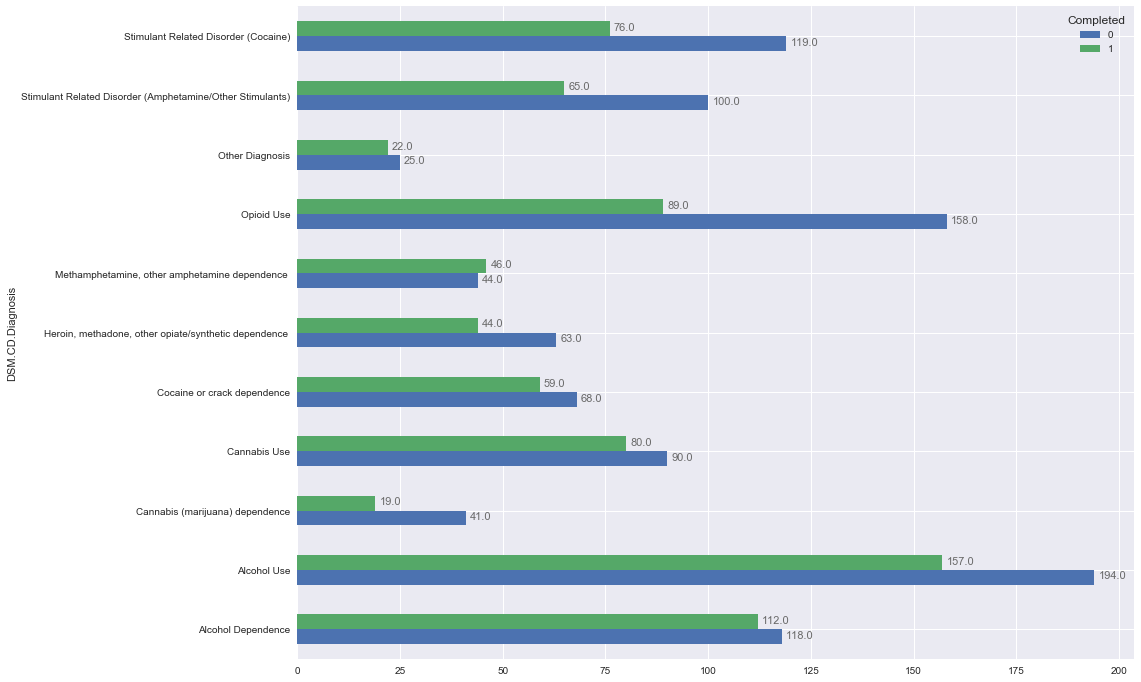

In [46]:
#Plotting the chart of diagnosis and completion with new bins
g = pd.crosstab(df_dis['DSM.CD.Diagnosis'], df_dis['Completed']).plot(kind = 'barh', figsize = (15,12))

# set individual bar lables using above list
for i in g.patches:
    # get_width pulls left or right; get_y pushes up or down
    g.text(i.get_width()+1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')


In [47]:
df_dsm_cd = df_dis[['DSM.CD.Diagnosis','Completed']]

#creating dummy variables for CHSR dimensions
df_dsm_cd = pd.concat([pd.get_dummies(df_dsm_cd, columns = ['DSM.CD.Diagnosis'], drop_first=True)], axis =1)
df_dsm_cd.sample(5)

,Completed,DSM.CD.Diagnosis_Alcohol Use,DSM.CD.Diagnosis_Cannabis (marijuana) dependence,DSM.CD.Diagnosis_Cannabis Use,DSM.CD.Diagnosis_Cocaine or crack dependence,"DSM.CD.Diagnosis_Heroin, methadone, other opiate/synthetic dependence","DSM.CD.Diagnosis_Methamphetamine, other amphetamine dependence",DSM.CD.Diagnosis_Opioid Use,DSM.CD.Diagnosis_Other Diagnosis,DSM.CD.Diagnosis_Stimulant Related Disorder (Amphetamine/Other Stimulants),DSM.CD.Diagnosis_Stimulant Related Disorder (Cocaine)
2522,0,0,0,0,0,1,0,0,0,0,0
2892,1,1,0,0,0,0,0,0,0,0,0
2817,0,0,0,0,0,0,0,0,0,1,0
2321,0,0,0,0,1,0,0,0,0,0,0
3256,0,0,0,0,0,0,0,0,0,1,0


In [48]:
#Running a logistic regression of the DSM CD diagnosis versus completion
cols = df_dsm_cd.columns[1:]
model = sm.Logit(df_dsm_cd['Completed'].astype(int),df_dsm_cd[cols])
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.678168
         Iterations 4
                                                      Results: Logit
Model:                                  Logit                               Pseudo R-squared:                    0.007    
Dependent Variable:                     Completed                           AIC:                                 2446.4849
Date:                                   2018-03-13 17:57                    BIC:                                 2501.3790
No. Observations:                       1789                                Log-Likelihood:                      -1213.2  
Df Model:                               9                                   LL-Null:                             -1222.4  
Df Residuals:                           1779                                LLR p-value:                         0.032236 
Converged:                              1.0000                              Scale:         

**Looking at the regression outputs and the correlations: **
There seems to be a correlation between some diagnosis and the completion rate.

**Decoding the summary we see that the following regressors are significant:**
(Considering significance level = 5%)  
  
Regressor | pvalue
---|---
DSM.CD.Diagnosis_Opioid Use  |0.0000
DSM.CD.Diagnosis_Cannabis (marijuana) dependence |0.0056 
DSM.CD.Diagnosis_Stimulant Related Disorder (Cocaine) |0.0023
DSM.CD.Diagnosis_Stimulant Related Disorder (Amphetamine/Other Stimulants) |0.0069 

**However we can also see that the R-squared value is very low - indicating that this model explains merely 7% of our output**

**Let us conduct a chi-square test to check for dependence between DSM CD Diagnosis and Completion**

In [49]:
#crosstabulating
tab = pd.crosstab(df_dis['DSM.CD.Diagnosis'],df_dis['Completed'])

#chi-sq test
chiTest1 = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest1)

Chi-square value, p-value and expected counts: 
(18.285037601706541, 0.050341637100404339, 10, array([[ 131.13471213,   98.86528787],
       [ 200.12297373,  150.87702627],
       [  34.20905534,   25.79094466],
       [  96.92565679,   73.07434321],
       [  72.40916713,   54.59083287],
       [  61.00614869,   45.99385131],
       [  51.31358301,   38.68641699],
       [ 140.82727781,  106.17272219],
       [  26.79709335,   20.20290665],
       [  94.07490218,   70.92509782],
       [ 111.17942985,   83.82057015]]))


**We see that the p-value is not very low, pvalue = 0.05 and thus there might not be a strong correlation between DSM CD Diagnosis and Completion.**

## Exploring relation between number of medical care sessions attended and Completion 

In [50]:
print( df_dis['Number.of.Medical.Care.sessions.in.past.30.days'].value_counts())
print('Number of Nan\'s:', df_dis['Number.of.Medical.Care.sessions.in.past.30.days'].isnull().sum())

0.0     28
1.0     22
4.0     11
10.0     6
3.0      6
8.0      4
6.0      4
2.0      4
5.0      3
20.0     2
12.0     1
7.0      1
Name: Number.of.Medical.Care.sessions.in.past.30.days, dtype: int64
Number of Nan's: 1697


** Huge number of missing data here, so maybe this may not be a good representation of the actual data? CHi-square test cannot be trusted!**

In [52]:
#crosstab
tab = pd.crosstab(df_dis['Number.of.Medical.Care.sessions.in.past.30.days'], df_dis['Completed'])
print(tab)
#tab.plot(kind = 'barh', figsize = (15,12))
#Bucket this data to use Chi-square test

Completed                                         0  1
Number.of.Medical.Care.sessions.in.past.30.days       
0.0                                              23  5
1.0                                              13  9
2.0                                               4  0
3.0                                               3  3
4.0                                               6  5
5.0                                               0  3
6.0                                               2  2
7.0                                               0  1
8.0                                               0  4
10.0                                              1  5
12.0                                              0  1
20.0                                              0  2


In [53]:
df_temp = df_dis[:]
df_temp = df_temp[pd.notnull(df['Number.of.Medical.Care.sessions.in.past.30.days'])]
print(df_temp['Number.of.Medical.Care.sessions.in.past.30.days'].isnull().sum())

0


c:\users\prabl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [54]:
df_temp['Medical.Care.sessions'] = None
for ind,row in df_temp.iterrows():
    value = df_temp.loc[ind, 'Number.of.Medical.Care.sessions.in.past.30.days']
    
    if value <= 1.0:
        df_temp.loc[ind,'Medical.Care.sessions'] = "Less than (or equal to) 1"
    elif value > 1:
        df_temp.loc[ind,'Medical.Care.sessions'] = "More than 1"

#Looking at the data now
print(df_temp['Medical.Care.sessions'].unique())

['Less than (or equal to) 1' 'More than 1']


Completed                   0   1
Medical.Care.sessions            
Less than (or equal to) 1  36  14
More than 1                16  26


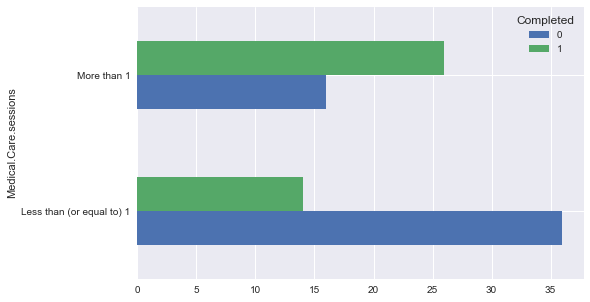

In [55]:
tab = pd.crosstab(df_temp['Medical.Care.sessions'], df_dis['Completed'])
print(tab)
tab.plot(kind = 'barh', figsize = (8,5))

In [56]:
#Checking for independance of Number of medical care sessions attended and Completion
#chi-sq test
chiTest = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest)

Chi-square value, p-value and expected counts: 
(9.3422967032967037, 0.002239247172294844, 1, array([[ 28.26086957,  21.73913043],
       [ 23.73913043,  18.26086957]]))


**Looking at the p-vlaue = 0.002 we can say that there is a dependance between the Completion and the number of medical care sessions**

## Exploring relation between number of self-help programs attended and Completion 

Completed                                             0    1
Number.of.self.help.programs.attended.in.past.3...          
1-3 times past month (less than once per week)      177  144
16-30 times past month (0ver 3 times per week)        2   45
4-7 times past month (once per week)                 53  138
8-15 times past month (2 or 3 times per week)        57  250
No attendance                                       304  102
Some attendance, but frequency unknown               76   50
Unknown                                             351   40


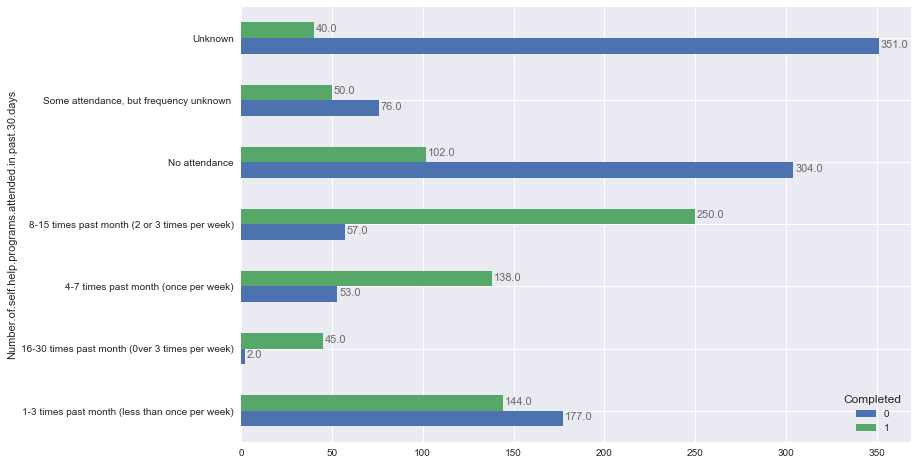

In [58]:
#crosstab
tab = pd.crosstab(df_dis['Number.of.self.help.programs.attended.in.past.30.days'], df_dis['Completed'])
print(tab)
g = tab.plot(kind = 'barh', figsize = (12,8))
#The category of 16-30 times a week has only 2 obs in the completed=0 category, does this affect the chi-square test reliability?

# set individual bar lables using above list
for i in g.patches:
    # get_width pulls left or right; get_y pushes up or down
    g.text(i.get_width()+1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

In [59]:
#Checking for independance of Number of self help sessions attended and Completion
#chi-sq test
chiTest = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest)

Chi-square value, p-value and expected counts: 
(530.35226365215806, 2.4254010902125529e-111, 6, array([[ 183.01844606,  137.98155394],
       [  26.79709335,   20.20290665],
       [ 108.89882616,   82.10117384],
       [ 175.03633315,  131.96366685],
       [ 231.48127446,  174.51872554],
       [  71.83901621,   54.16098379],
       [ 222.92901062,  168.07098938]]))


**The p-value for this chi-square test is very small - indicating that there is a relationship between number of self help sessions attended and completion**

## Exploring relation between Interactions with family and Completion 

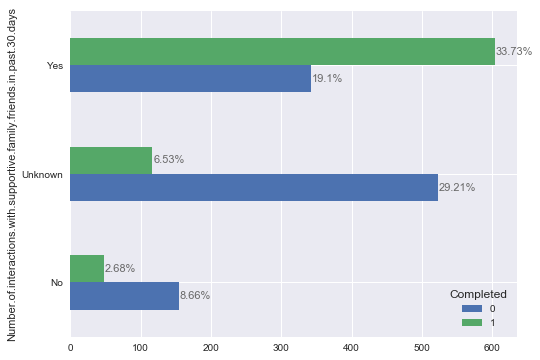

In [62]:
#crosstab
tab = pd.crosstab(df_dis['Number.of.interactions.with.supportive.family.friends.in.past.30.days'], df_dis['Completed'])
#print(tab)
g= tab.plot(kind = 'barh', figsize = (8,6))

# find the values and append to list
for i in g.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in g.patches:
    # get_width pulls left or right; get_y pushes up or down
    g.text(i.get_width()+1, i.get_y()+0.1, \
            str(round(((i.get_width())/total)*100, 2))+'%', fontsize=11, color='dimgrey')

In [63]:
#Checking for independance of Interactions with family and Completion
#chi-sq test
chiTest = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest)

Chi-square value, p-value and expected counts: 
(358.35596622308907, 1.5275331928247765e-78, 2, array([[ 115.74063723,   87.25936277],
       [ 364.89659027,  275.10340973],
       [ 539.3627725 ,  406.6372275 ]]))


**The p-value for this chi-square test is very small - indicating that there is a strong relationship between interactions with family and completion**

## Exploring relation between number of children lost parental rights to and Completion 

In [64]:
#crosstab
tab = pd.crosstab(df_dis['Number.of.children.client.lost.parental.rights.to'], df_dis['Completed'])
print(tab)
#tab.plot(kind = 'barh', figsize = (15,12))

Completed                                            0    1
Number.of.children.client.lost.parental.rights.to          
Five                                                 1    1
Four                                                 5    5
No children/no child protect involvement           484  577
One                                                 27   28
Six                                                  2    1
Ten or more                                          0    1
Three                                               17    5
Two                                                  9   16
Unknown                                            475  135


In [65]:
#Looking at the distribution we can't use a chi-square test since we do not have enough observations in each category
#Let's bucket the data
for ind,row in df_dis.iterrows():
    value = df_dis.loc[ind, 'Number.of.children.client.lost.parental.rights.to']
    
    if value in {'One','Two'}:
        df_dis.loc[ind,'Number.of.children.client.lost.parental.rights.to'] = "1 to 2 Children"
    elif value in {'Three','Four','Five','Six','Ten or more'}:
        df_dis.loc[ind,'Number.of.children.client.lost.parental.rights.to'] = "3 to 10 Children"

#Looking at the data now
print(df_dis['Number.of.children.client.lost.parental.rights.to'].unique())

['No children/no child protect involvement' 'Unknown' '1 to 2 Children'
 '3 to 10 Children']


Completed                                            0    1
Number.of.children.client.lost.parental.rights.to          
1 to 2 Children                                     36   44
3 to 10 Children                                    25   13
No children/no child protect involvement           484  577
Unknown                                            475  135


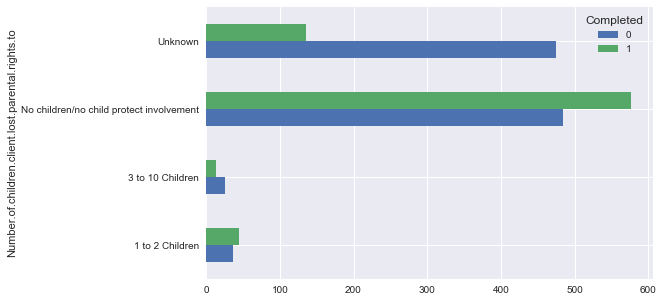

In [66]:
#crosstab
tab = pd.crosstab(df_dis['Number.of.children.client.lost.parental.rights.to'], df_dis['Completed'])
print(tab)
tab.plot(kind = 'barh', figsize = (8,5))

In [67]:
#Checking for independance of Number of children lost parental rights to and Completion
#chi-sq test
chiTest = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest)
#Skewed distribution of data might affect chi-square test? is this reliable?

Chi-square value, p-value and expected counts: 
(170.3876653803751, 1.0494808080586518e-36, 3, array([[  45.61207378,   34.38792622],
       [  21.66573505,   16.33426495],
       [ 604.93012856,  456.06987144],
       [ 347.7920626 ,  262.2079374 ]]))


**The p-value for this chi-square test is very small - indicating that there is a strong relationship between  Number of children lost parental rights to and completion**

## Exploring relation between Enrolled in job or school training and Completion 

In [68]:
#crosstab
tab = pd.crosstab(df_dis['Enrolled.in.school.or.job.training'], df_dis['Completed'])
print(tab)
#tab.plot(kind = 'barh', figsize = (8,5))for ind,row in df_dis.iterrows():
if (value.find('full time') or value.find('part time')): 
    value = df_dis.loc[ind, 'Enrolled.in.school.or.job.training']
    #print(value)    

Completed                             0    1
Enrolled.in.school.or.job.training          
Enrolled, full time                   1   59
Enrolled, part time                  10   29
Not enrolled                        729  599
Unknown                             280   82


In [69]:
#Combining Enrolled part time and full time - into enrolled
for ind,row in df_dis.iterrows():
    value = df_dis.loc[ind, 'Enrolled.in.school.or.job.training']
    #print(value)
    if (value.find('full time') != -1 or value.find('part time')!= -1):      
        #print(value)
        df_dis.loc[ind,'Enrolled.in.school.or.job.training'] = "Enrolled"

#Looking at the data now
print(df_dis['Enrolled.in.school.or.job.training'].unique())

['Not enrolled' 'Unknown' 'Enrolled']


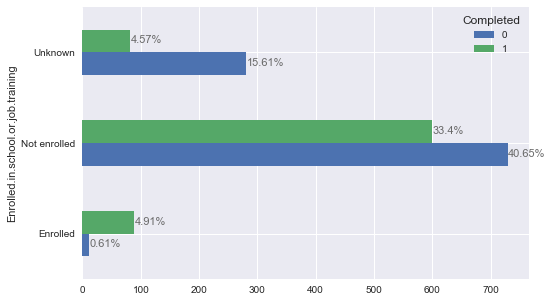

In [72]:
#crosstab
tab = pd.crosstab(df_dis['Enrolled.in.school.or.job.training'], df_dis['Completed'])
#print(tab)
g=tab.plot(kind = 'barh', figsize = (8,5))

# find the values and append to list
for i in g.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in g.patches:
    # get_width pulls left or right; get_y pushes up or down
    g.text(i.get_width()+1, i.get_y()+0.1, \
            str(round(((i.get_width())/total)*100, 2))+'%', fontsize=11, color='dimgrey')

In [73]:
#Checking for independance of enrolled in job or school training and Completion
#chi-sq test
chiTest = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest)

Chi-square value, p-value and expected counts: 
(148.62295663028905, 5.3325510978361335e-33, 2, array([[  56.44494131,   42.55505869],
       [ 757.16042482,  570.83957518],
       [ 206.39463387,  155.60536613]]))


**The p-value for this chi-square test is very small - indicating that there is a strong relationship between enrolled in job or school training and completion** Note that skewed distribution might affect this chi-square test! Is this reliable??

## Exploring relation between how much were you helped by treatment and Completion 

In [74]:
print(df_dis.groupby('How.much.were.you.helped.by.treatment')
      ['How.much.were.you.helped.by.treatment'].count())
na_count = df_dis['How.much.were.you.helped.by.treatment'].isnull().sum();
print("Number of NA values: ", na_count)

How.much.were.you.helped.by.treatment
A little        92
A lot          466
Not at all      50
Somewhat       145
Unknown       1036
Name: How.much.were.you.helped.by.treatment, dtype: int64
Number of NA values:  0


Completed                                0    1
How.much.were.you.helped.by.treatment          
A little                                74   18
A lot                                   50  416
Not at all                              47    3
Somewhat                                98   47
Unknown                                751  285


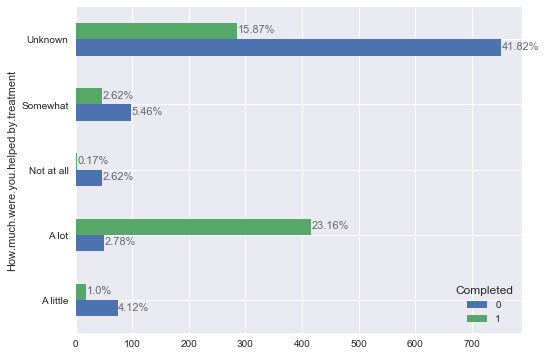

In [76]:
#crosstab
tab = pd.crosstab(df_dis['How.much.were.you.helped.by.treatment'], df_dis['Completed'])
print(tab)
#print("NA count: ",df_dis['How.much.were.you.helped.by.treatment'].isnull().sum())
g=tab.plot(kind = 'barh', figsize = (8,6))

# find the values and append to list
for i in g.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in g.patches:
    # get_width pulls left or right; get_y pushes up or down
    g.text(i.get_width()+1, i.get_y()+0.1, \
            str(round(((i.get_width())/total)*100, 2))+'%', fontsize=11, color='dimgrey')

In [77]:
#Checking for independance of how mcuh did program help and Completion
#chi-sq test
chiTest = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest)

Chi-square value, p-value and expected counts: 
(563.69449558985207, 1.1139033249615246e-120, 4, array([[  52.45388485,   39.54611515],
       [ 265.69032979,  200.30967021],
       [  28.50754612,   21.49245388],
       [  82.67188373,   62.32811627],
       [ 590.67635551,  445.32364449]]))


** Looking at the p-value which if of the order ~e^-120 indicates a high significance. Meaning there is a high correlation between how much did the program help the client and the Completion**

## Exploring relation between Where clieant has been living for the past 30 days and Completion 

In [78]:
print(df_dis.groupby('Where.client.has.been.living.in.past.30.days')
      ['Where.client.has.been.living.in.past.30.days'].count())
na_count = df_dis['Where.client.has.been.living.in.past.30.days'].isnull().sum();
print("Number of NA values: ", na_count)

Where.client.has.been.living.in.past.30.days
Children living with their family                                                          8
Dependent living - dependent children and/or adults living in a supervised setting       576
Homeless - no fixed address (includes shelters)                                          687
Independent living - including on own, self supported and non-supervised group homes     344
Unknown                                                                                  174
Name: Where.client.has.been.living.in.past.30.days, dtype: int64
Number of NA values:  0


Completed                                             0    1
Where.client.has.been.living.in.past.30.days                
Children living with their family                     5    3
Dependent living - dependent children and/or ad...  295  281
Homeless - no fixed address (includes shelters)     393  294
Independent living - including on own, self sup...  173  171
Unknown                                             154   20


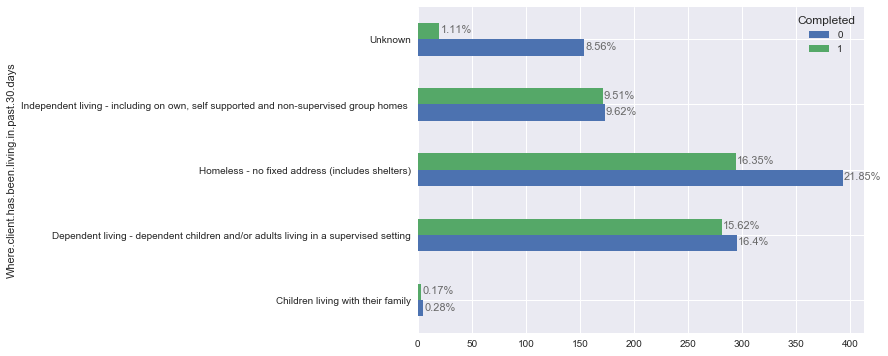

In [80]:
#crosstab
tab = pd.crosstab(df_dis['Where.client.has.been.living.in.past.30.days'], df_dis['Completed'])
print(tab)
#print("NA count: ",df_dis['How.much.were.you.helped.by.treatment'].isnull().sum())
g=tab.plot(kind = 'barh', figsize = (8,6))

# find the values and append to list
for i in g.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in g.patches:
    # get_width pulls left or right; get_y pushes up or down
    g.text(i.get_width()+1, i.get_y()+0.1, \
            str(round(((i.get_width())/total)*100, 2))+'%', fontsize=11, color='dimgrey')

In [81]:
#Checking for independance of how mcuh did program help and Completion
#chi-sq test
chiTest = scipy.stats.chi2_contingency(tab)
print('Chi-square value, p-value and expected counts: ')
print(chiTest)

Chi-square value, p-value and expected counts: 
(84.766516141213444, 1.7002275894227462e-17, 4, array([[   4.56120738,    3.43879262],
       [ 328.40693125,  247.59306875],
       [ 391.69368362,  295.30631638],
       [ 196.13191727,  147.86808273],
       [  99.20626048,   74.79373952]]))


** Looking at the p-value which if of the order ~e^-17 indicates a high significance. Meaning there is a high correlation between how much did the program help the client and the Completion**

## Overall, these are my findings: 

### Discharge and Admissions data are duplicates - possibly just copied off each other (why is this so??)

### Strong Dependance of Completion and following features:

* Enrolled in job or school training
* Number of children lost to parental rights
* Interactions with family
* Number of self help sessions attended
* CHSR Dimensions 4,5 and 3
* How much did the program help you
* Where the clieant has been living for the past 30 days

Note: Some of this data is not represented well in all categories - so maybe chi-square test isnt very reliable??
  
CHSR Dimension Definitions: 
* CHSR Dimension 3 - Emotional/Behavioral/Cognitive Conditions and Complications  
* CHRS Dimension 4 – Treatment Acceptance/Resistance
* CHRS Dimension 5 – Relapse/Continued Use/Continued Problem Potential
* CHRS Dimension 6 – Recovery Environment

### Slight dependance of Completion and following features:

* Number of medical care sessions attended
* DSM CD Diagnosis type

## Calculating number of NA values in every column 

In [62]:
#Getting total number of rows of data
total_rows = df_dis.shape[0]
print(total_rows)

#Calculating 50% of total_rows
size_50 = round(total_rows/2);
print(size_50)

1789
894


In [102]:
Null_vals = pd.DataFrame(df_dis.isnull().sum(axis=0))
print(type(Null_vals))
High_nulls = Null_vals[Null_vals[0] > size_50]
print(High_nulls)

<class 'pandas.core.frame.DataFrame'>
                                                       0
CD.Treatments.used                                  1552
Days.used.in.past.30..Tertiary.                     1332
Days.used.in.past.30.days..Secondary.               1074
Disabilities.or.Barriers.to.Treatment               1410
Hours.of.treatment                                  1721
If.no..what.language.do.you.speak                   1635
Number.of..sessions.living.skills.development.i...  1700
Number.of.alcohol.drug.testing.sessions.in.past...  1521
Number.of.arrests.in.past.30.days                   1174
Number.of.Childcare.sessions.in.past.30.days        1704
Number.of.Co.Occurring.mental.illness.sessions....  1679
Number.of.Coordination.of.services.sessions.in....  1706
Number.of.days.client.used.alcohol.in.past.30.days  1035
Number.of.days.client.used.illicit.drugs.in.pas...  1018
Number.of.detox.sessions.in.past.30.days            1717
Number.of.Employment.Education.sessions.in.past...

In [106]:
High_nulls.columns = ['NA Count']
High_nulls.to_csv('High_null_value_fields.csv')